In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Temperature.xlsx')
df.columns = ['temp']
df.head()

,temp
0,8.2
1,7.2
2,10.8
3,17.6
4,18.2


In [5]:
print(len(df),len(df.dropna()))
df = df.dropna()

29107 29095


In [6]:
def dataset_builder(df,n):
  col=[('t'+str(i)) for i in range(1,n+1)]
  col.append('y')
  data_frame = pd.DataFrame(columns=col)
  i = 0
  while True:
    try:
      data_frame.loc[data_frame.shape[0]] = list(df.loc[i:(n+i)]['temp'])
      i += 1
      pass
    except:
      break
  return data_frame


def array_builder(data, n):
  feature = [('t'+str(i)) for i in range(1,n+1)]
  return np.array(data.loc[:][feature]), np.array(data.loc[:]['y'])   

In [7]:
df3 = dataset_builder(df,3)
df5 = dataset_builder(df,5)
df10 = dataset_builder(df,10)

In [8]:
df3.head(4)

,t1,t2,t3,y
0,8.2,7.2,10.8,17.6
1,7.2,10.8,17.6,18.2
2,10.8,17.6,18.2,11.6
3,17.6,18.2,11.6,10.2


In [9]:
df5.head(6)

,t1,t2,t3,t4,t5,y
0,8.2,7.2,10.8,17.6,18.2,11.6
1,7.2,10.8,17.6,18.2,11.6,10.2
2,10.8,17.6,18.2,11.6,10.2,8.8
3,17.6,18.2,11.6,10.2,8.8,10.4
4,18.2,11.6,10.2,8.8,10.4,11.2
5,11.6,10.2,8.8,10.4,11.2,14.0


In [10]:
df10.head(11)

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,y
0,8.2,7.2,10.8,17.6,18.2,11.6,10.2,8.8,10.4,11.2,14.0
1,7.2,10.8,17.6,18.2,11.6,10.2,8.8,10.4,11.2,14.0,11.6
2,10.8,17.6,18.2,11.6,10.2,8.8,10.4,11.2,14.0,11.6,10.2
3,17.6,18.2,11.6,10.2,8.8,10.4,11.2,14.0,11.6,10.2,9.2
4,18.2,11.6,10.2,8.8,10.4,11.2,14.0,11.6,10.2,9.2,8.8
5,11.6,10.2,8.8,10.4,11.2,14.0,11.6,10.2,9.2,8.8,8.2
6,10.2,8.8,10.4,11.2,14.0,11.6,10.2,9.2,8.8,8.2,7.4
7,8.8,10.4,11.2,14.0,11.6,10.2,9.2,8.8,8.2,7.4,3.0
8,10.4,11.2,14.0,11.6,10.2,9.2,8.8,8.2,7.4,3.0,5.4
9,11.2,14.0,11.6,10.2,9.2,8.8,8.2,7.4,3.0,5.4,8.6


### Normalization function

In [11]:
# Normalization
def normalize(df):
  dfmin, dfmax = df.min(), df.max() 
  return (df - dfmin) / (dfmax - dfmin) , dfmin , dfmax

def normalizer(df, dfmin, dfmax):
  return (df - dfmin) / (dfmax - dfmin) 

## Split into train and test set

In [12]:
def data_splitter(data, ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

def trn_est_val_tst(data, ratio):
  trn, tst = data_splitter(data, ratio)
  est, val = data_splitter(data, ratio)
  return trn,est,val,tst

### df3

In [13]:
np.random.seed(42)
df3_trn,df3_est,df3_val,df3_tst = trn_est_val_tst(data = df3, ratio = 0.2)

df3_est_n , df3_est_min , df3_est_max = normalize(df3_est)
df3_val_n = normalizer(df3_val, df3_est_min, df3_est_max)

df3_trn_n, df3_trn_min, df3_trn_max = normalize(df3_trn)
df3_tst_n = normalizer(df3_tst, df3_trn_min, df3_trn_max)

df3_trnX, df3_trnY = array_builder(df3_trn, 3)
df3_estX, df3_estY = array_builder(df3_est, 3)
df3_valX, df3_valY = array_builder(df3_val, 3)
df3_tstX, df3_tstY = array_builder(df3_tst, 3)

df3_trn_nX, df3_trn_nY = array_builder(df3_trn_n, 3)
df3_est_nX, df3_est_nY = array_builder(df3_est_n, 3)
df3_val_nX, df3_val_nY = array_builder(df3_val_n, 3)
df3_tst_nX, df3_tst_nY = array_builder(df3_tst_n, 3)

### df5

In [14]:
df5_trn,df5_est,df5_val,df5_tst = trn_est_val_tst(data = df5, ratio = 0.2)

df5_est_n , df5_est_min , df5_est_max = normalize(df5_est)
df5_val_n = normalizer(df5_val, df5_est_min, df5_est_max)

df5_trn_n, df5_trn_min, df5_trn_max = normalize(df5_trn)
df5_tst_n = normalizer(df5_tst, df5_trn_min, df5_trn_max)

df5_trnX, df5_trnY = array_builder(df5_trn, 5)
df5_estX, df5_estY = array_builder(df5_est, 5)
df5_valX, df5_valY = array_builder(df5_val, 5)
df5_tstX, df5_tstY = array_builder(df5_tst, 5)

df5_trn_nX, df5_trn_nY = array_builder(df5_trn_n, 5)
df5_est_nX, df5_est_nY = array_builder(df5_est_n, 5)
df5_val_nX, df5_val_nY = array_builder(df5_val_n, 5)
df5_tst_nX, df5_tst_nY = array_builder(df5_tst_n, 5)

### df10

In [15]:
df10_trn, df10_est, df10_val, df10_tst = trn_est_val_tst(data = df10, ratio = 0.2)

df10_est_n , df10_est_min , df10_est_max = normalize(df10_est)
df10_val_n = normalizer(df10_val, df10_est_min, df10_est_max)

df10_trn_n, df10_trn_min, df10_trn_max = normalize(df10_trn)
df10_tst_n = normalizer(df10_tst, df10_trn_min, df10_trn_max)

df10_trnX, df10_trnY = array_builder(df10_trn, 10)
df10_estX, df10_estY = array_builder(df10_est, 10)
df10_valX, df10_valY = array_builder(df10_val, 10)
df10_tstX, df10_tstY = array_builder(df10_tst, 10)

df10_trn_nX, df10_trn_nY = array_builder(df10_trn_n, 10)
df10_est_nX, df10_est_nY = array_builder(df10_est_n, 10)
df10_val_nX, df10_val_nY = array_builder(df10_val_n, 10)
df10_tst_nX, df10_tst_nY = array_builder(df10_tst_n, 10)

In [16]:
df10_val.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,y
6884,30.2,27.8,22.8,20.0,17.0,19.4,28.0,32.0,32.8,30.4,24.8
4340,39.0,36.0,29.4,27.0,25.0,26.6,33.4,36.6,37.4,32.4,27.2
6312,4.8,5.4,9.2,7.6,10.6,5.0,3.4,2.2,1.4,0.4,4.6
19658,21.6,17.4,11.9,9.2,9.9,21.8,25.1,25.7,20.1,15.3,12.6
15488,12.1,22.9,25.7,26.3,22.0,16.1,14.4,15.6,17.5,27.8,29.3


In [17]:
df10_valX[:5][:]

array([[30.2, 27.8, 22.8, 20. , 17. , 19.4, 28. , 32. , 32.8, 30.4],
       [39. , 36. , 29.4, 27. , 25. , 26.6, 33.4, 36.6, 37.4, 32.4],
       [ 4.8,  5.4,  9.2,  7.6, 10.6,  5. ,  3.4,  2.2,  1.4,  0.4],
       [21.6, 17.4, 11.9,  9.2,  9.9, 21.8, 25.1, 25.7, 20.1, 15.3],
       [12.1, 22.9, 25.7, 26.3, 22. , 16.1, 14.4, 15.6, 17.5, 27.8]])

## Neural Network MLP

import libraries

In [18]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### df3

Linear act. function

In [19]:
model1 = Sequential()
model1.add(Dense(100,activation = 'linear'))
model1.add(Dense(1, activation = 'linear'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model1.compile(loss = 'mean_squared_error', optimizer = optimizer)
model1.build(input_shape = (1,3))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 100)                  400       
                                                                 
 dense_1 (Dense)             (1, 1)                    101       
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [20]:
history3 = model1.fit(df3_trn_nX, df3_trnY, validation_split = 0.2,batch_size = 100, epochs = 100, shuffle = True, verbose = 1)

Epoch 1/100
139/139 [==============================] - 1s 3ms/step - loss: 85.1068 - val_loss: 39.5265
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 27.5925 - val_loss: 20.6242
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 19.3569 - val_loss: 17.6745
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 17.7365 - val_loss: 16.4476
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 16.5974 - val_loss: 15.7252
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 15.8887 - val_loss: 15.1243
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 15.4686 - val_loss: 14.7192
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 15.3601 - val_loss: 14.5686
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 15.2316 - val_loss: 14.6641
Epoch 10/100
139/139 [==============================] - 0s 3ms/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


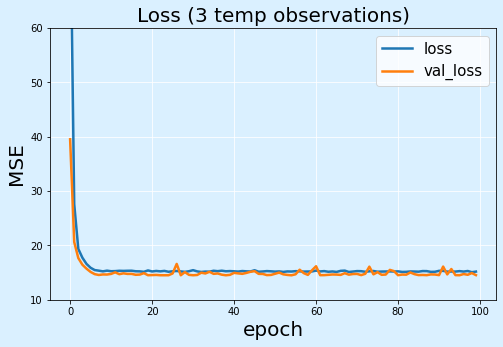

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), facecolor= '#daf0ff')
plt.title('Loss (3 temp observations)', fontsize = 20)
plt.plot(history3.history['loss'], linewidth=2.5)
plt.plot(history3.history['val_loss'], linewidth=2.5)
plt.xlabel('epoch',  fontsize = 20)
plt.ylabel('MSE', fontsize = 20)
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.grid(c='white')
ax = plt.axes()
ax.set_facecolor('#daf0ff')
plt.gca().set_ylim(10, 60)
plt.show()

Elu act. function

In [24]:
model1_1 = Sequential()
model1_1.add(Dense(100,activation = 'elu'))
model1_1.add(Dense(1, activation = 'elu'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model1_1.compile(loss = 'mean_squared_error', optimizer = optimizer)
model1_1.build(input_shape = (1,3))
model1_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (1, 100)                  400       
                                                                 
 dense_5 (Dense)             (1, 1)                    101       
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [25]:
history3_1 = model1_1.fit(df3_trn_nX, df3_trnY, validation_split = 0.2,batch_size = 100, epochs = 100, shuffle = True, verbose = 1)

Epoch 1/100
139/139 [==============================] - 1s 3ms/step - loss: 88.9017 - val_loss: 38.8815
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 26.4611 - val_loss: 19.9944
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 19.0478 - val_loss: 17.6870
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 17.4361 - val_loss: 17.3743
Epoch 5/100
139/139 [==============================] - 1s 6ms/step - loss: 16.3943 - val_loss: 15.4321
Epoch 6/100
139/139 [==============================] - 1s 5ms/step - loss: 15.6144 - val_loss: 14.8580
Epoch 7/100
139/139 [==============================] - 1s 6ms/step - loss: 15.2907 - val_loss: 15.0064
Epoch 8/100
139/139 [==============================] - 0s 3ms/step - loss: 15.2618 - val_loss: 15.5219
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 15.2534 - val_loss: 14.5953
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


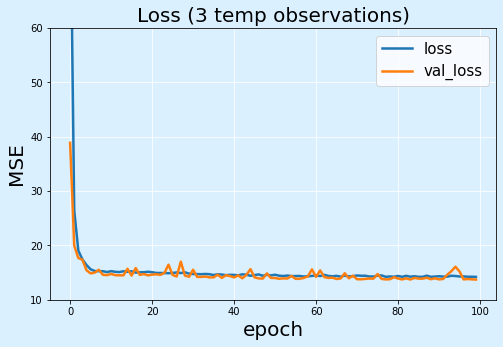

In [26]:
plt.figure(figsize=(8,5), facecolor= '#daf0ff')
plt.title('Loss (3 temp observations)', fontsize = 20)
plt.plot(history3_1.history['loss'], linewidth=2.5)
plt.plot(history3_1.history['val_loss'], linewidth=2.5)
plt.xlabel('epoch',  fontsize = 20)
plt.ylabel('MSE', fontsize = 20)
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.grid(c='white')
ax = plt.axes()
ax.set_facecolor('#daf0ff')
plt.gca().set_ylim(10, 60)
plt.show()

## df5

Linear act. function

In [27]:
model2 = Sequential()
model2.add(Dense(100, activation = 'linear'))
model2.add(Dense(1, activation = 'linear'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model2.compile(loss = 'mse', optimizer = optimizer)
model2.build(input_shape = (1,5))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (1, 100)                  600       
                                                                 
 dense_7 (Dense)             (1, 1)                    101       
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [28]:
history5 = model2.fit(df5_trn_nX, df5_trnY, validation_split = 0.2, epochs = 100, shuffle = True, verbose = 1)

Epoch 1/100
432/432 [==============================] - 1s 2ms/step - loss: 39.2462 - val_loss: 11.7325
Epoch 2/100
432/432 [==============================] - 2s 5ms/step - loss: 11.9076 - val_loss: 11.4091
Epoch 3/100
432/432 [==============================] - 1s 2ms/step - loss: 11.6335 - val_loss: 11.2006
Epoch 4/100
432/432 [==============================] - 1s 2ms/step - loss: 11.6057 - val_loss: 11.7580
Epoch 5/100
432/432 [==============================] - 1s 2ms/step - loss: 11.3961 - val_loss: 11.4865
Epoch 6/100
432/432 [==============================] - 1s 2ms/step - loss: 11.3971 - val_loss: 10.8582
Epoch 7/100
432/432 [==============================] - 1s 2ms/step - loss: 11.4032 - val_loss: 11.2149
Epoch 8/100
432/432 [==============================] - 1s 2ms/step - loss: 11.3262 - val_loss: 10.9529
Epoch 9/100
432/432 [==============================] - 1s 2ms/step - loss: 11.4143 - val_loss: 11.5749
Epoch 10/100
432/432 [==============================] - 1s 2ms/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


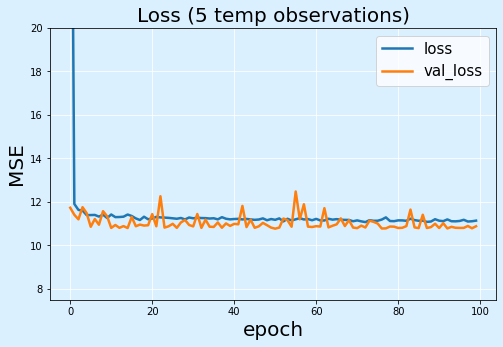

In [29]:
plt.figure(figsize=(8,5), facecolor= '#daf0ff')
plt.title('Loss (5 temp observations)', fontsize = 20)
plt.plot(history5.history['loss'], linewidth=2.5)
plt.plot(history5.history['val_loss'], linewidth=2.5)
plt.xlabel('epoch',  fontsize = 20)
plt.ylabel('MSE', fontsize = 20)
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.grid(c='white')
ax = plt.axes()
ax.set_facecolor('#daf0ff')
plt.gca().set_ylim(7.5, 20)
plt.show()

Elu act. function

In [30]:
model2_1 = Sequential()
model2_1.add(Dense(100, activation = 'elu'))
model2_1.add(Dense(1, activation = 'elu'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model2_1.compile(loss = 'mse', optimizer = optimizer)
model2_1.build(input_shape = (1,5))
model2_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (1, 100)                  600       
                                                                 
 dense_9 (Dense)             (1, 1)                    101       
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [31]:
history5_1 = model2_1.fit(df5_trn_nX, df5_trnY, validation_split = 0.2, epochs = 100, shuffle = True, verbose = 1)

Epoch 1/100
432/432 [==============================] - 1s 2ms/step - loss: 40.4379 - val_loss: 11.9929
Epoch 2/100
432/432 [==============================] - 1s 2ms/step - loss: 11.9667 - val_loss: 11.2730
Epoch 3/100
432/432 [==============================] - 1s 2ms/step - loss: 11.7536 - val_loss: 12.4389
Epoch 4/100
432/432 [==============================] - 1s 2ms/step - loss: 11.7241 - val_loss: 11.0345
Epoch 5/100
432/432 [==============================] - 1s 2ms/step - loss: 11.5341 - val_loss: 11.2285
Epoch 6/100
432/432 [==============================] - 1s 2ms/step - loss: 11.4445 - val_loss: 11.6750
Epoch 7/100
432/432 [==============================] - 1s 2ms/step - loss: 11.3233 - val_loss: 10.7019
Epoch 8/100
432/432 [==============================] - 1s 2ms/step - loss: 11.3044 - val_loss: 12.5747
Epoch 9/100
432/432 [==============================] - 1s 2ms/step - loss: 11.0992 - val_loss: 11.5457
Epoch 10/100
432/432 [==============================] - 1s 2ms/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


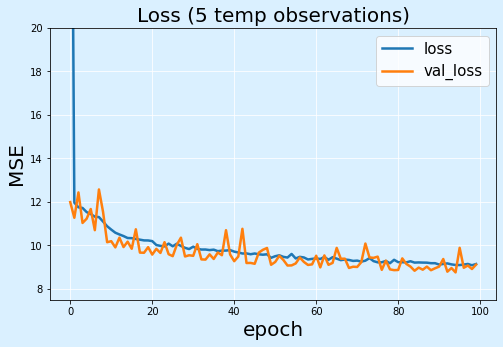

In [32]:
plt.figure(figsize=(8,5), facecolor= '#daf0ff')
plt.title('Loss (5 temp observations)', fontsize = 20)
plt.plot(history5_1.history['loss'], linewidth=2.5)
plt.plot(history5_1.history['val_loss'], linewidth=2.5)
plt.xlabel('epoch',  fontsize = 20)
plt.ylabel('MSE', fontsize = 20)
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.grid(c='white')
ax = plt.axes()
ax.set_facecolor('#daf0ff')
plt.gca().set_ylim(7.5, 20)
plt.show()

## df10

Linear act. function

In [33]:
model3 = Sequential()
model3.add(Dense(100, activation = 'linear'))
model3.add(Dense(1, activation = 'linear'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model3.compile(loss = 'mse', optimizer = optimizer)
model3.build(input_shape = (1,10))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (1, 100)                  1100      
                                                                 
 dense_11 (Dense)            (1, 1)                    101       
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [34]:
history10 = model3.fit(df10_trn_nX, df10_trnY, validation_split = 0.2, epochs = 100, shuffle = True, verbose = 1)

Epoch 1/100
432/432 [==============================] - 1s 2ms/step - loss: 24.6527 - val_loss: 5.9824
Epoch 2/100
432/432 [==============================] - 1s 2ms/step - loss: 5.4374 - val_loss: 4.6937
Epoch 3/100
432/432 [==============================] - 1s 2ms/step - loss: 4.6871 - val_loss: 5.0866
Epoch 4/100
432/432 [==============================] - 1s 2ms/step - loss: 4.6507 - val_loss: 3.8982
Epoch 5/100
432/432 [==============================] - 2s 4ms/step - loss: 4.3761 - val_loss: 3.8109
Epoch 6/100
432/432 [==============================] - 2s 5ms/step - loss: 4.2717 - val_loss: 3.7307
Epoch 7/100
432/432 [==============================] - 2s 5ms/step - loss: 4.2094 - val_loss: 3.8486
Epoch 8/100
432/432 [==============================] - 2s 4ms/step - loss: 4.2080 - val_loss: 3.7228
Epoch 9/100
432/432 [==============================] - 2s 5ms/step - loss: 4.1484 - val_loss: 3.6665
Epoch 10/100
432/432 [==============================] - 2s 4ms/step - loss: 4.1557 - val_l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


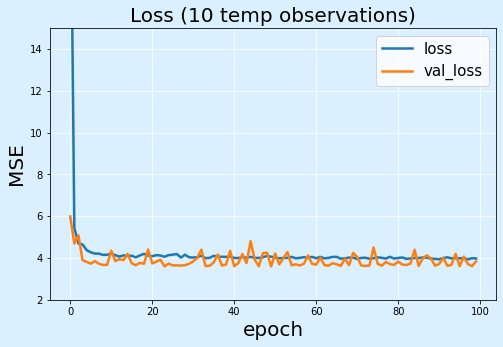

In [35]:
plt.figure(figsize=(8,5), facecolor= '#daf0ff')
plt.title('Loss (10 temp observations)', fontsize = 20)
plt.plot(history10.history['loss'], linewidth=2.5)
plt.plot(history10.history['val_loss'], linewidth=2.5)
plt.xlabel('epoch',  fontsize = 20)
plt.ylabel('MSE', fontsize = 20)
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.grid(c='white')
ax = plt.axes()
ax.set_facecolor('#daf0ff')
plt.gca().set_ylim(2, 15)
plt.show()

Elu act. function

In [37]:
model3_1 = Sequential()
model3_1.add(Dense(100, activation = 'elu'))
model3_1.add(Dense(1, activation = 'elu'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model3_1.compile(loss = 'mse', optimizer = optimizer)
model3_1.build(input_shape = (1,10))
model3_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (1, 100)                  1100      
                                                                 
 dense_15 (Dense)            (1, 1)                    101       
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [38]:
history10_1 = model3_1.fit(df10_trn_nX, df10_trnY, validation_split = 0.2, epochs = 100, shuffle = True, verbose = 1)

Epoch 1/100
432/432 [==============================] - 1s 2ms/step - loss: 24.1728 - val_loss: 6.5491
Epoch 2/100
432/432 [==============================] - 1s 2ms/step - loss: 5.9503 - val_loss: 5.4042
Epoch 3/100
432/432 [==============================] - 1s 2ms/step - loss: 5.3253 - val_loss: 5.3068
Epoch 4/100
432/432 [==============================] - 1s 2ms/step - loss: 5.1491 - val_loss: 4.7810
Epoch 5/100
432/432 [==============================] - 1s 2ms/step - loss: 5.0652 - val_loss: 5.1197
Epoch 6/100
432/432 [==============================] - 1s 2ms/step - loss: 5.0673 - val_loss: 4.6315
Epoch 7/100
432/432 [==============================] - 1s 2ms/step - loss: 4.8606 - val_loss: 4.5514
Epoch 8/100
432/432 [==============================] - 1s 2ms/step - loss: 4.9105 - val_loss: 4.9826
Epoch 9/100
432/432 [==============================] - 1s 2ms/step - loss: 4.7703 - val_loss: 5.4128
Epoch 10/100
432/432 [==============================] - 1s 2ms/step - loss: 4.6227 - val_l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


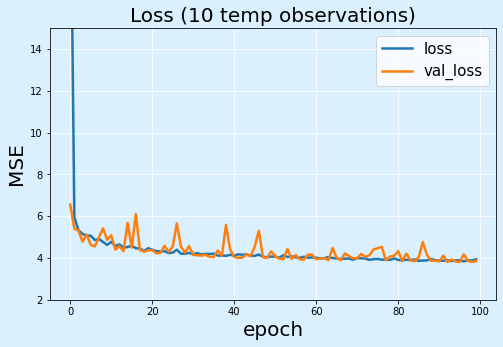

In [39]:
plt.figure(figsize=(8,5), facecolor= '#daf0ff')
plt.title('Loss (10 temp observations)', fontsize = 20)
plt.plot(history10_1.history['loss'], linewidth=2.5)
plt.plot(history10_1.history['val_loss'], linewidth=2.5)
plt.xlabel('epoch',  fontsize = 20)
plt.ylabel('MSE', fontsize = 20)
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.grid(c='white')
ax = plt.axes()
ax.set_facecolor('#daf0ff')
plt.gca().set_ylim(2, 15)
plt.show()

# Final conclusion

In [40]:
report = {'NeuralNet1(df3)':  [model1.evaluate(x=df3_tst_nX, y=df3_tstY,verbose=0),model1_1.evaluate(x=df3_tst_nX, y=df3_tstY,verbose=0)],
          'NeuralNet1(df5)':  [model2.evaluate(x=df5_tst_nX, y=df5_tstY,verbose=0),model2_1.evaluate(x=df5_tst_nX, y=df5_tstY,verbose=0)],
          'NeuralNet1(df10)': [model3.evaluate(x=df10_tst_nX, y=df10_tstY,verbose=0),model3_1.evaluate(x=df10_tst_nX, y=df10_tstY,verbose=0)]}

pd.DataFrame(report, index = ['linear','elu'])          

,NeuralNet1(df3),NeuralNet1(df5),NeuralNet1(df10)
linear,15.513148,10.978749,4.099261
elu,14.856105,9.047754,3.765659
